# Label Claim Sentiment

In [1]:
from datasets import load_dataset

dataset_t = load_dataset("climate_fever")

In [ ]:
from transformers import pipeline

pipe = pipeline("text2text-generation", model="deabardhoshi/BERTClimate")

In [1]:
import pandas as pd

In [4]:
import requests

API_URL = "https://api-inference.huggingface.co/models/lxyuan/distilbert-base-multilingual-cased-sentiments-student"
headers = {"Authorization": f""}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
output = query({
	"inputs": dataset_t['test']['claim'],
})

In [33]:
max_labels  = [max(outputs, key=lambda x: x['score'])['label'] for outputs in output]

In [ ]:
dataset_t = pd.DataFrame(dataset_t['test'])
dataset_t['labels'] = max_labels

In [3]:
dataset = pd.read_csv('Climate Topic Data.csv')

Background: how is climate change talked about? This project started as a curiosity about the kinds of stories that get told about climate. I wanted to know how to distinguish true information about the science and the effects of climate change from that which is false. As I'll explore below, factfulness is more of a spectrum.

This dataset is complied by Google researchers and I am using Huggingface models to classify statements based on sentiment. Secondly, I wanted to know more about the kinds of topics that make up the climate discourse and make these findings into a tool for others to use too. So I labelled the dataset into a handful of commonly talked about climate topics (bears, sea levels, warmings) and then fine tuned a BERTopic model on it. This new model is called BERTClimate, check it out!

# Explore

In [9]:
dataset_gr = dataset.groupby(['claim_label', 'labels'], as_index = False).count()

In [5]:
dataset_gr

,claim_label,labels,Unnamed: 0,claim_id,Topic,claim,evidences
0,0,negative,471,471,156,471,471
1,0,neutral,22,22,9,22,22
2,0,positive,161,161,54,161,161
3,1,negative,151,151,47,151,151
4,1,neutral,51,51,21,51,51
5,1,positive,51,51,13,51,51
6,2,negative,292,292,110,292,292
7,2,neutral,40,40,12,40,40
8,2,positive,142,142,41,142,142
9,3,negative,96,96,27,96,96


In [6]:
dataset_gr['percent_sent'] = dataset_gr['claim_id'] / dataset_gr.groupby('claim_label')['claim_id'].transform('sum')

In [7]:
import seaborn as sns

How do different claims compare in their sentiment? First off, most claims are classified as negative, across all 4 truthfulness categories. Claims that are supported by facts are the most negative (70%) compared to 60% for the rest. 

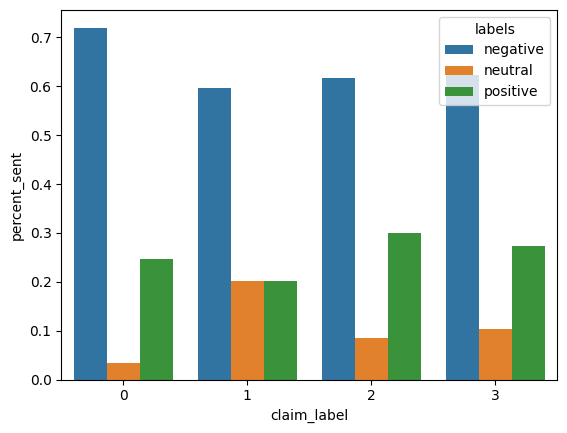

In [8]:
sns.barplot(x = 'claim_label', y = 'percent_sent', hue = 'labels', data = dataset_gr);

In [9]:
# 0 supports, 1 refutes, 2 not enough, 3 dispute


Here's a supported claim:

In [13]:
dataset[dataset['claim_label'] == 0]['claim'][0]

'Global warming is driving polar bears toward extinction'

# Topic Modeling

Most of the coverage is about warming, and then CO2 and extreme weather:

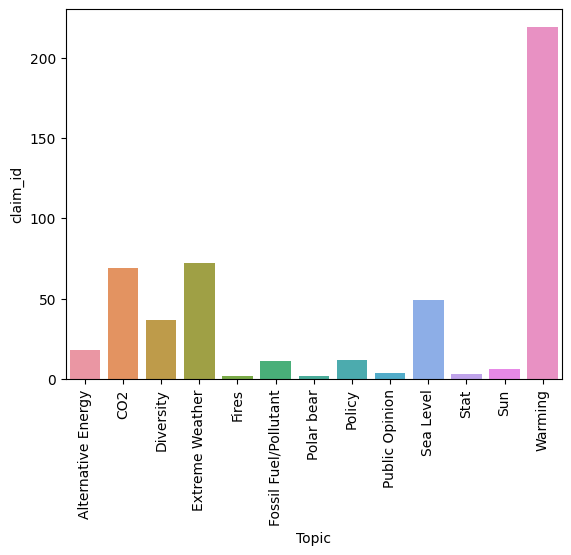

In [19]:
dataset_a = dataset.groupby('Topic', as_index = False).count()
sns.barplot(x = 'Topic', y = 'claim_id', data = dataset_a);
plt.xticks(rotation = 90);

In [14]:
dataset_g = dataset.groupby(['Topic', 'claim_label'], as_index = False).count()
dataset_g['perc'] = dataset_g['claim_id'] / dataset_g.groupby(['Topic'])['claim_id'].transform('sum')

In [15]:
import matplotlib.pyplot as plt

Claims about fires don't have enough evidence, which is to the case for other topics. Strikingly, most topics are not talked about in a way that is factually supported. For all topics, there is almost an even split between "supports" and "refutes" or not being enough evidence for the claims:

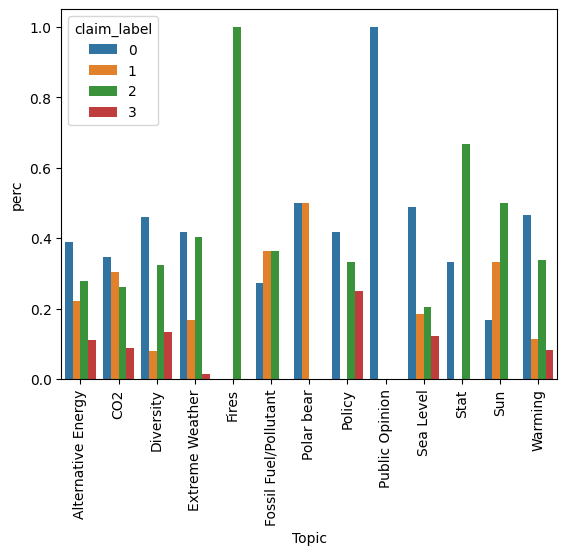

In [16]:
sns.barplot(x = 'Topic', y = 'perc', hue = 'claim_label', data = dataset_g);
plt.xticks(rotation = 90);

In [24]:
dataset_l = dataset.groupby(['Topic', 'labels'], as_index = False).count()
dataset_l['perc'] = dataset_l['claim_id'] / dataset_l.groupby(['Topic'])['claim_id'].transform('sum')

Unsurprisingly, most of the topics have a negative label:

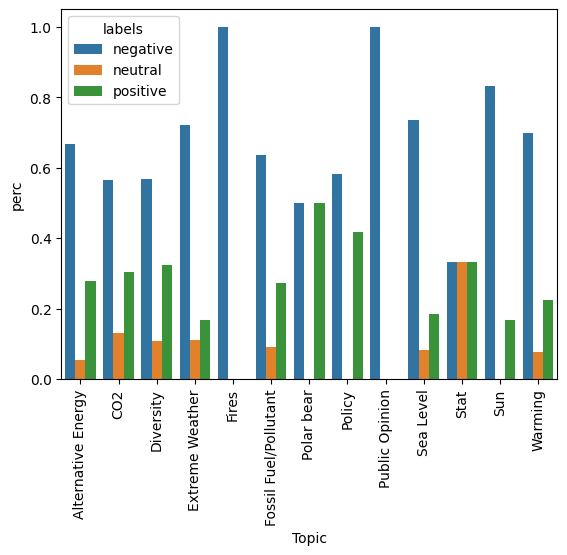

In [26]:
sns.barplot(x = 'Topic', y = 'perc', hue = 'labels', data = dataset_l);
plt.xticks(rotation = 90);

In [ ]:
# additional: language around modeling / cost effectiveness / expertise / policy

This was a short exploration of the language of climate change. A few things stuck out to me which would make for interesting follow up questions. First, in the "warming" topic category, a lot of the claims were related to modeling and predictions. Given climate is so complex, building models is key but often not well understood. I would like to think more about that: how science in particular gets talked about. This is also related to topics of public policy around climate change.